# Introduction to Wine Classification with Machine Learning

Welcome to this comprehensive guide on applying machine learning for the classification of wine varieties. In this Jupyter Notebook, we delve into the world of wine classification using the Wine Dataset, sourced from the UCI Machine Learning Repository.

The Wine Dataset contains the results of a chemical analysis of wines grown in a specific area of Italy. It includes 13 different measurements taken from three types of wine cultivars. This complexity offers a more realistic task for classification models, allowing us to explore the machine learning algorithms.

In this notebook, we will employ a variety of machine learning models to classify the type of wine based on its chemical characteristics. The models chosen for this task are:

1. **Logistic Regression**: A fundamental and straightforward linear model for classification, serving as a good baseline for performance comparison.
2. **Support Vector Machine (SVM)**: Known for its effectiveness in high-dimensional spaces, making it suitable for our dataset with numerous features.
3. **K-Nearest Neighbors (KNN)**: A non-parametric method that is simple yet powerful for classification tasks.
4. **Decision Tree**: Offers clear visualization and interpretation of the model's decision-making process.

Each of these models brings a approach to the classification task, allowing us to explore and understand the strengths and weaknesses of different machine learning techniques. By comparing these models, we aim to gain insights into their performance metrics and suitability for various types of classification problems.

## Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load the Iris dataset

In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
wine_df = pd.DataFrame(X, columns=wine.feature_names)

# Add target column for visualization
wine_df['target'] = y

In [3]:
wine_df.head() # Display the first few records

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [4]:
wine_df.describe() # Statistical summary

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

## Check for missing values

In [5]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Data Visualization

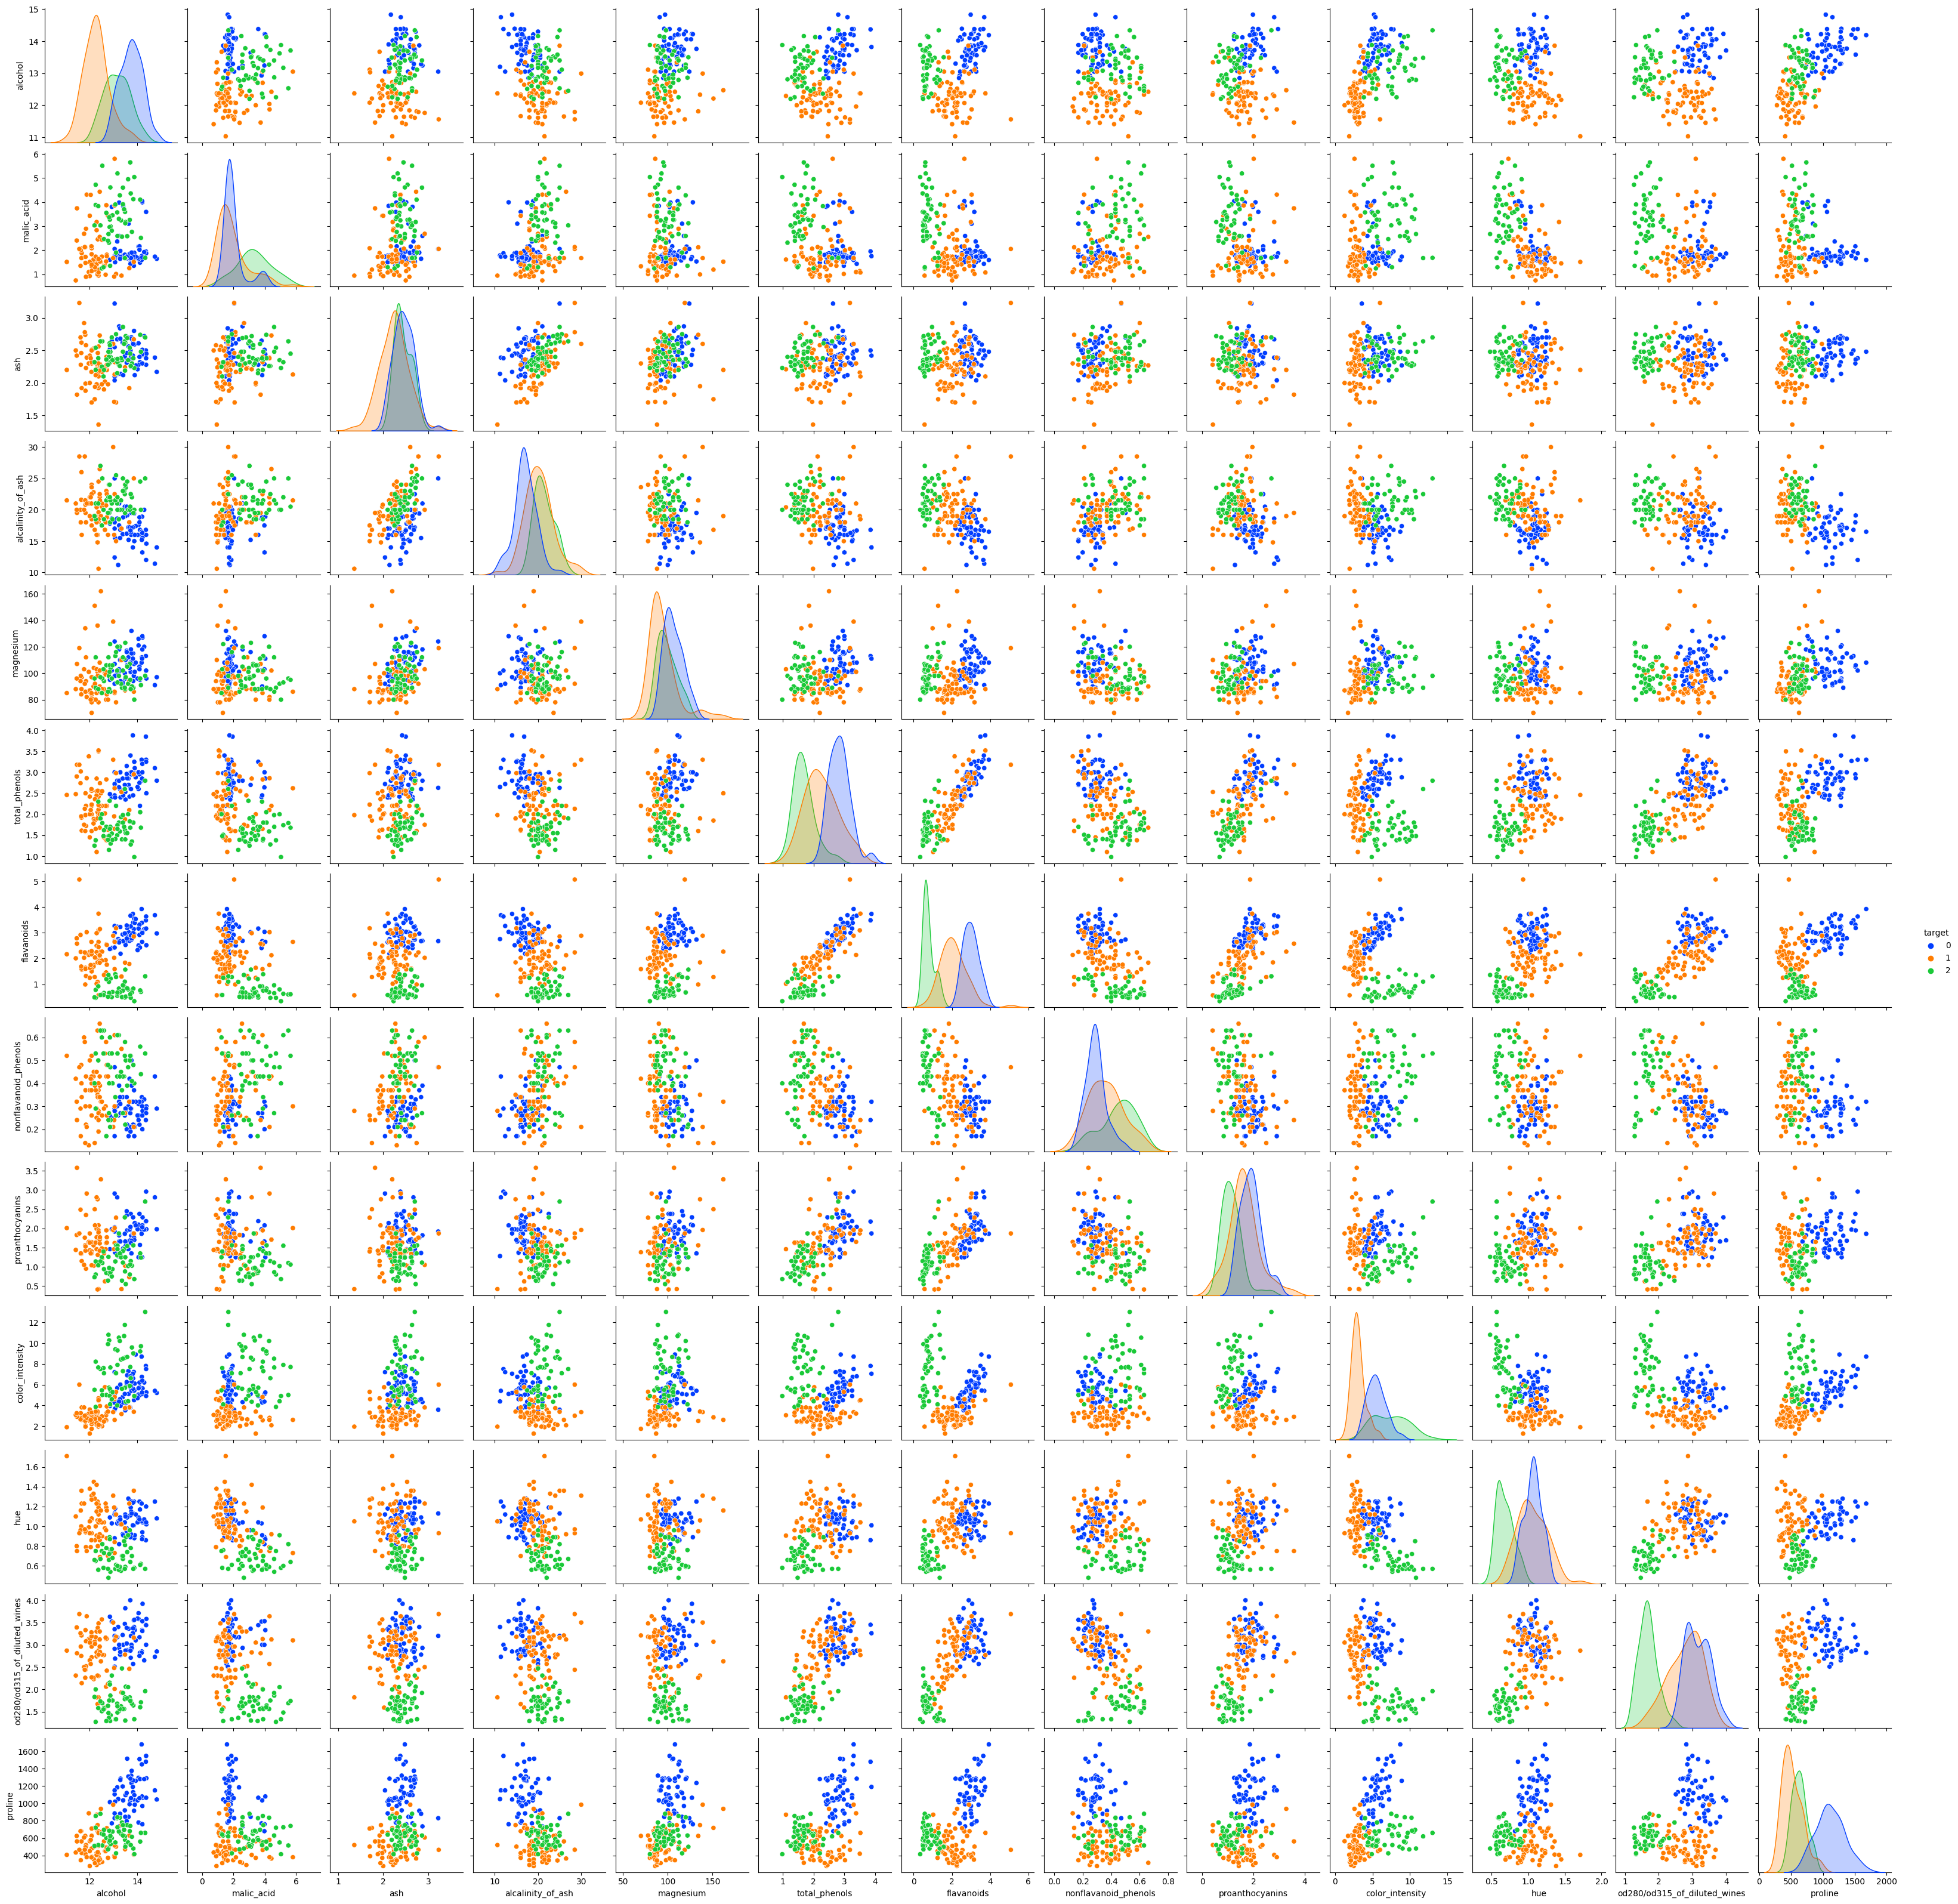

In [6]:
sns.pairplot(wine_df, hue='target', palette='bright')
plt.show()

## Splitting the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Standardization

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification Algorithms

In [9]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

## Training, Evaluating Models, and Storing Accuracy

<Figure size 600x600 with 0 Axes>

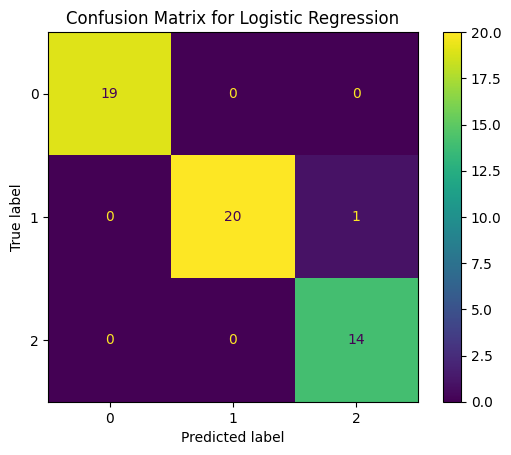

---Logistic Regression---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<Figure size 600x600 with 0 Axes>

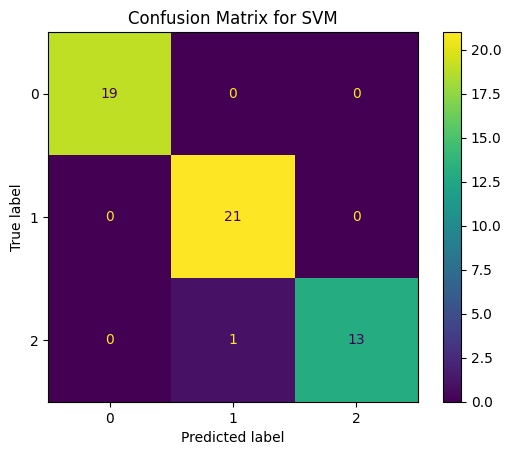

---SVM---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<Figure size 600x600 with 0 Axes>

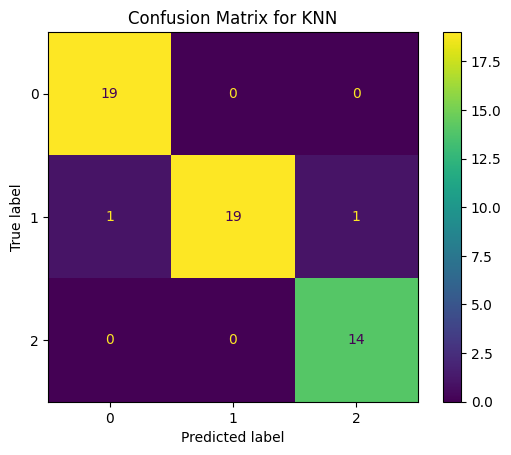

---KNN---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



<Figure size 600x600 with 0 Axes>

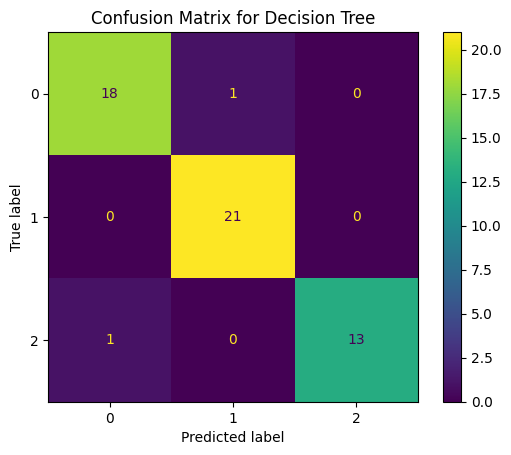

---Decision Tree---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [10]:
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[name] = accuracy
    
    # Plotting Confusion Matrix
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    print(f'---{name}---')
    print(classification_report(y_test, predictions))

## Identifying the Best Model

In [11]:
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"The best performing model is {best_model} with an accuracy of {accuracy_scores[best_model]:.2f}")

The best performing model is Logistic Regression with an accuracy of 0.98
